In [2]:
# Boring things first
import datetime

fundamentals = init_fundamentals()

today = datetime.datetime.now().strftime('%Y-%m-%d')
today

'2017-02-02'

In [3]:
# Collect all the data
fundamental_df = get_fundamentals(
        query(
            fundamentals.share_class_reference.is_primary_share,
            fundamentals.valuation.market_cap,
            fundamentals.valuation_ratios.total_yield,
            fundamentals.cash_flow_statement.financing_cash_flow
        )

        # Filters that someone thought were important.  We'll probably want to filter to only things we can buy
        # via Robinhood.
        #.filter(fundamentals.asset_classification.morningstar_sector_code != 103)
        #.filter(fundamentals.company_reference.country_id == "USA")
        #.filter(fundamentals.asset_classification.morningstar_sector_code != 104)
        #.filter(fundamentals.share_class_reference.is_depositary_receipt == False)
        .filter(fundamentals.share_class_reference.is_primary_share == True),
        #.filter(fundamentals.company_reference.primary_exchange_id != "OTCPK")        
        
        today
    )

# OK, let's check out what we get back.
# When we provide a query and a date, we get back the same type of response
# as in the IDE: a dataframe with securities as columns and each requested
# metric as rows.

transposed = fundamental_df.transpose()


4499


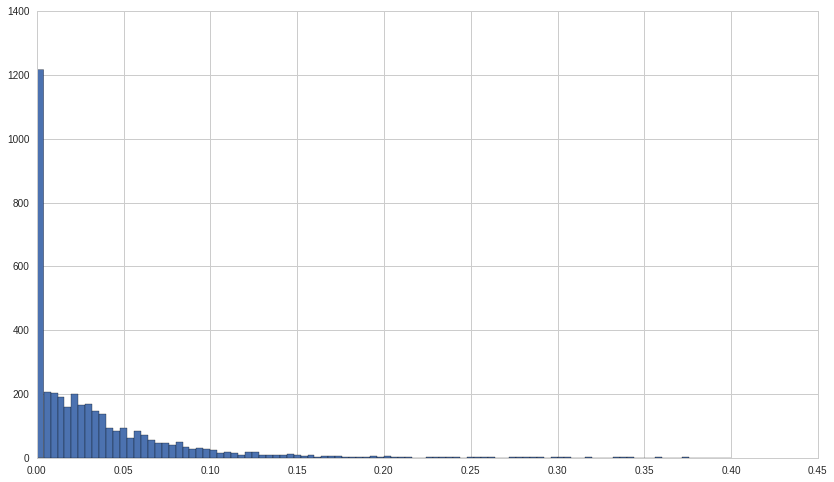

In [4]:
yields = transposed["total_yield"]
print len(yields)
yields.hist(bins=100, range=(0,0.4))

4499


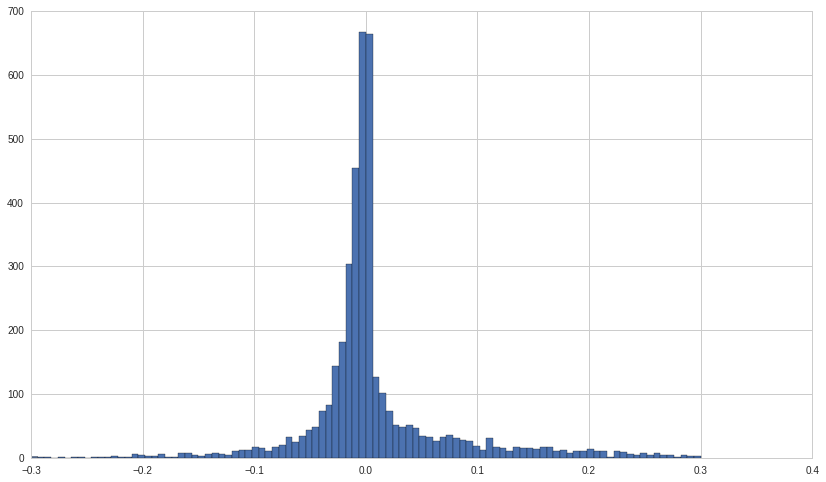

In [5]:
rulevalues = transposed.financing_cash_flow / transposed.market_cap
print len(rulevalues)
rulevalues.hist(bins=100, range=(-0.3,0.3))